In [8]:
import numpy as np
from matplotlib import pyplot
from sklearn.decomposition import PCA
import pandas as pd

np.random.seed(10)

In [9]:
siglas = pd.read_csv("siglas-dev.csv")
siglas.head()

,longitud,cant_vocales,cant_consonantes,prop_vocales,prop_consonantes,cant_consonantes_vecinas,cant_vocales_vecinas,cant_consonantes_distintas,cant_vocales_distintas,cant_consonantes_iniciales,...,cant_letra_R,cant_letra_S,cant_letra_T,cant_letra_U,cant_letra_V,cant_letra_W,cant_letra_X,cant_letra_Y,cant_letra_Z,clase
0,4,2,2,0.500000,0.500000,1,1,2,1,1,...,0,1,0,0,0,0,0,0,0,acronimo
1,4,3,1,0.250000,0.750000,1,2,1,2,0,...,0,0,0,0,0,0,0,0,0,acronimo
2,3,2,1,0.333333,0.666667,1,1,1,2,0,...,0,0,0,1,0,0,0,0,0,acronimo
3,3,1,2,0.666667,0.333333,1,1,2,1,1,...,0,0,0,0,0,0,0,0,0,acronimo
4,3,2,1,0.333333,0.666667,1,1,1,2,0,...,0,1,0,0,0,0,0,0,0,acronimo


In [10]:
genero = pd.read_csv("genero.csv")
display(genero.head())

,pcm_loudness_sma_maxPos,pcm_loudness_sma_minPos,pcm_loudness_sma_amean,pcm_loudness_sma_linregc1,pcm_loudness_sma_linregc2,pcm_loudness_sma_linregerrA,pcm_loudness_sma_linregerrQ,pcm_loudness_sma_stddev,pcm_loudness_sma_skewness,pcm_loudness_sma_kurtosis,...,shimmerLocal_sma_de_quartile3,shimmerLocal_sma_de_iqr1-2,shimmerLocal_sma_de_iqr2-3,shimmerLocal_sma_de_iqr1-3,shimmerLocal_sma_de_percentile99.0,shimmerLocal_sma_de_upleveltime75,shimmerLocal_sma_de_upleveltime90,F0final__Turn_numOnsets,F0final__Turn_duration,gender
0,16,120,0.416503,-0.000172,0.442538,0.171803,0.046154,0.215363,0.648227,3.173967,...,0.019973,0.020172,0.022912,0.043083,0.147333,0.066421,0.018450,14,3.05,m
1,46,4,0.360616,-0.000199,0.389547,0.134897,0.028417,0.169404,0.469004,3.029455,...,0.029609,0.022776,0.033646,0.056422,0.138265,0.046875,0.011719,12,2.94,m
2,179,0,0.423538,-0.000975,0.552752,0.203101,0.057784,0.251776,0.340085,2.080629,...,0.023967,0.023843,0.028746,0.052589,0.133463,0.082927,0.014634,9,2.68,f
3,274,14,0.398092,0.000393,0.339768,0.221290,0.065696,0.258530,0.376392,2.299270,...,0.018540,0.020117,0.020323,0.040440,0.112048,0.063636,0.022727,8,3.00,f
4,194,186,0.412215,0.000181,0.388010,0.187604,0.050548,0.225266,0.445536,2.432539,...,0.015643,0.014819,0.019811,0.034629,0.102689,0.082192,0.018265,10,2.71,f


### Ejercicio
Experimentar con diferentes algoritmos de clasificación (árboles, Naive Bayes, SVM, KNN) para los ejemplos A
y B, usando 10-fold CV. ¿Qué algoritmos funcionan mejor para los datos originales?

### Ejercicio
Rankear los atributos de cada ejemplo según su ganancia de información. Conservar sólo los primeros $k$
atributos (probar con distintos valores de $k$) y ver cómo afecta esto al desempeño de los algoritmos del ejercicio
anterior. ¿Hay diferencia en los atributos encontrados si la seleccion se hace al principio o en cada iteracion del folding?

### Ejercicio
Experimentar con otros métodos de selección de atributos.
Utilizar las siguientes políticas de selección de atributos y comparar cómo funcionan en los dos datasets

- Ranking de atributos por p-valor: Para cada atributo comparar usando un test de hipótesis  [ttest](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_ind.html), [kruskall](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mstats.kruskalwallis.html), [ks_test](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html), etc. la diferencia entre la proyeccion del atributo separando por clase y se quede con los $k$  más significativamente distintos.
- Random Search: Elegir un subset de $k$ atributos al azar
- [Genetic Search](http://topepo.github.io/caret/feature-selection-using-genetic-algorithms.html)
- Recursive Feature Elimination utilizando Random Forest como algoritmo base.

Usando los distintosalgoritmos de clasificación vistos en clase, ¿cómo afecta al desempeño hacer selección de atributos?
En general, ¿cuán sensible es cada algoritmo de aprendizaje a la cantidad y calidad de atributos?



In [11]:
# Genero n puntos (x,y) a distancia e de la recta y=m*x+b,
# donde e=rand[0,1]*d.
def genDatos(n, b, m, d):
    tmp = []
    alfa = np.arctan(m)
    for x in range(n):
        y = m * x + b
        e = np.random.uniform(0.0, 1.0) * d
        x -= e * np.sin(alfa)
        y += e * np.cos(alfa)
        tmp.append([x,y])
    return np.array(tmp)

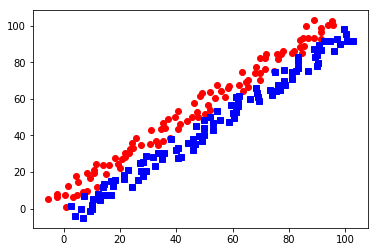

In [12]:
# Genero dos muestras de puntos y las ploteo.
rojo = genDatos(100, 0, 1, 10)
azul = genDatos(100, 0, 1, -10)
pyplot.plot(rojo[:,0], rojo[:,1], 'ro')
pyplot.plot(azul[:,0], azul[:,1], 'bs')
pyplot.show()

In [13]:
# Computo PCA sobre todos los puntos.
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
todos = np.concatenate((rojo, azul))
pca = PCA(n_components=2)
pca.fit(todos)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

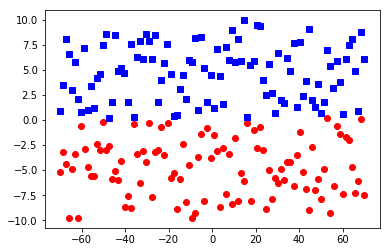

In [14]:
# Transformo las muestras originales al nuevo sistema de coordenadas,
# y las ploteo.
rojo_transf = pca.transform(rojo)
azul_transf = pca.transform(azul)
pyplot.plot(rojo_transf[:,0], rojo_transf[:,1], 'ro')
pyplot.plot(azul_transf[:,0], azul_transf[:,1], 'bs')
pyplot.show()

### Ejercicio 
Transformar con PCA los datos de los ejemplos A y B, conservar sólo las primeras $k$
Componentes (probar con distintos valores de $k$) y volver a evaluar los algoritmos de clasificación.